# Data Preprocessing

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.Load the dataset

In [2]:
df = pd.read_csv('Lumos5G-v1.0.csv',
                index_col=['run_num', 'seq_num'])
df.head(5)

abstractSignalStr   latitude  longitude  movingSpeed  \
run_num seq_num                                                         
1       1.0                      2  44.975314 -93.259316     0.094889   
        2.0                      2  44.975311 -93.259311     0.876634   
        3.0                      2  44.975305 -93.259292     2.225798   
        4.0                      2  44.975293 -93.259258     3.180726   
        5.0                      2  44.975278 -93.259214     3.751234   

                 compassDirection        nrStatus  lte_rssi  lte_rsrp  \
run_num seq_num                                                         
1       1.0                   150  NOT_RESTRICTED     -61.0       -94   
        2.0                   117  NOT_RESTRICTED     -61.0       -94   
        3.0                   113  NOT_RESTRICTED     -61.0       -94   
        4.0                   114  NOT_RESTRICTED     -59.0       -95   
        5.0                   115  NOT_RESTRICTED     -59.0       -95   

                 lte_rsrq     lte_rssnr  nr_ssRsrp  nr_ssRsrq  nr_ssSinr  \
run_num seq_num                                                            
1       1.0         -14.0  2.147484e+09        NaN        NaN        NaN   
        2.0         -14.0  2.147484e+09        NaN        NaN        NaN   
        3.0         -14.0  2.147484e+09        NaN        NaN        NaN   
        4.0         -16.0  2.147484e+09        NaN        NaN        NaN   
        5.0         -16.0  2.147484e+09        NaN        NaN        NaN   

                 Throughput mobility_mode trajectory_direction  tower_id  
run_num seq_num                                                           
1       1.0              78       driving                   CW        16  
        2.0             117       driving                   CW        16  
        3.0             110       driving                   CW        16  
        4.0             108       driving                   CW        16  
        5.0             100       driving                   CW        16

## 2.Constract a new dataset and scale it

In [3]:
ndf = df[["latitude", "longitude", "Throughput"]]
ndf.head()

latitude  longitude  Throughput
run_num seq_num                                  
1       1.0      44.975314 -93.259316          78
        2.0      44.975311 -93.259311         117
        3.0      44.975305 -93.259292         110
        4.0      44.975293 -93.259258         108
        5.0      44.975278 -93.259214         100

In [18]:
scaled_df=(ndf-ndf.min())/(ndf.max()-ndf.min())
scaled_df.head()

latitude  longitude  Throughput
run_num seq_num                                 
1       1.0      0.555052   0.931652    0.040625
        2.0      0.554351   0.932764    0.060937
        3.0      0.552584   0.936669    0.057292
        4.0      0.549415   0.943976    0.056250
        5.0      0.545235   0.953213    0.052083

## 3. Create Train-Test Sets

In [14]:
# split function into sequences
# y data from the last column 
def multistep_split(seq, n_steps_in, n_steps_out):
    X = list()
    y = list()
    for i in range(len(seq)):
        # pattern end
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(seq):
            break
        seq_x = seq[i:end_ix]
        seq_y = seq[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
scaled_df.loc[118]

,latitude,longitude,Throughput
seq_num,,,
1.0,0.524185,0.921343,0.145833
2.0,0.526585,0.917659,0.153125
3.0,0.529579,0.912756,0.159896
4.0,0.532006,0.908662,0.205208
5.0,0.534865,0.903918,0.166667
...,...,...,...
779.0,0.487425,0.976864,0.065104
780.0,0.488410,0.977389,0.054688
781.0,0.489017,0.977326,0.047917


In [27]:
run_max=scaled_df.index.max()[0]
run_max

118

In [52]:
# splits runs into sequences separately
seconds_in = 20
seconds_out = 10 
X_list = list()
y_list = list()
for run_num in range(1, run_max+1):
    run = scaled_df.loc[run_num]
    X, y = multistep_split(run.values, n_steps_in=seconds_in, n_steps_out=seconds_out)
    X_list.append(X)
    y_list.append(y)

In [53]:
print(X_list[2].shape)
print(y_list[2].shape)

(221, 20, 3)
(221, 10)


In [54]:
X = np.concatenate(X_list)
print(X.shape)

(64696, 20, 3)


In [55]:
y = np.concatenate(y_list)
print(y.shape)

(64696, 10)


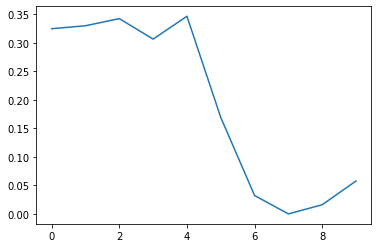

In [56]:
plt.plot(y[200])

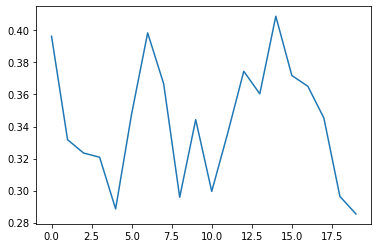

In [57]:
T = X[200, :, -1]
plt.plot(T)